# RNN Syntax Basics

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Creating Data

In [2]:
x = np.linspace(0,50,501)
y = np.sin(x)

In [3]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [4]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

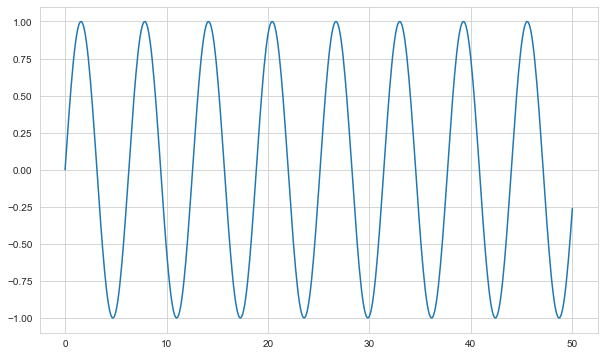

In [5]:
plt.plot(x,y)

Let's turn this into a DataFrame

In [6]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [7]:
df

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


## Preprocessing of Data

### Train Test Split

In [8]:
len(df)

501

In [9]:
test_percent = 0.15

In [10]:
len(df)*test_percent

75.14999999999999

In [11]:
test_point = np.round(len(df)*test_percent)

In [12]:
test_ind = int(len(df) - test_point)

In [13]:
test_ind

426

In [14]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [15]:
train

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
42.100,-0.952
42.200,-0.978
42.300,-0.994
42.400,-1.000


In [16]:
test

,Sine
42.600,-0.982
42.700,-0.959
42.800,-0.925
42.900,-0.883
43.000,-0.832
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


### Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [20]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [21]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.preprocessing.sequence:

class TimeseriesGenerator(keras_preprocessing.sequence.TimeseriesGenerator, keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  # Arguments
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`.
 |      length: Length of the outp

In [22]:
# define generator
length = 2 # Length of the output sequences (in number of timesteps)
batch_size = 2 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(data = train_scaled,
                                targets = train_scaled,
                                length = length,
                                batch_size = batch_size)

In [23]:
len(train_scaled)

426

In [24]:
len(generator) # = (len(train)-lenght)/(batch_size*stride) 

212

In [25]:
generator[0]

(array([[[0.49999912],
         [0.54991622]],
 
        [[0.54991622],
         [0.59933458]]]),
 array([[0.59933458],
        [0.64776041]]))

In [26]:
# What does the first batch look like?
X, y = generator[0]

In [27]:
print(f'Given the Array: \n{X}')
print(f'Predict this y: \n{y}')

Given the Array: 
[[[0.49999912]
  [0.54991622]]

 [[0.54991622]
  [0.59933458]]]
Predict this y: 
[[0.59933458]
 [0.64776041]]


In [28]:
train_scaled[:10]

array([[0.49999912],
       [0.54991622],
       [0.59933458],
       [0.64776041],
       [0.69470985],
       [0.73971381],
       [0.78232262],
       [0.82211054],
       [0.85868004],
       [0.89166571]])

In [29]:
gen = pd.DataFrame(generator, columns = ["X", "y"])

In [30]:
gen.head()

,X,y
0,"[[[0.4999991159163256], [0.5499162248393211]],...","[[0.5993345785103605], [0.6477604050750987]]"
1,"[[[0.5993345785103605], [0.6477604050750987]],...","[[0.6947098496819506], [0.7397138089998276]]"
2,"[[[0.6947098496819506], [0.7397138089998276]],...","[[0.782322618343557], [0.8221105445747755]]"
3,"[[[0.782322618343557], [0.8221105445747755]], ...","[[0.8586800398867209], [0.891665713970504]]"
4,"[[[0.8586800398867209], [0.891665713970504]], ...","[[0.9207379848742939], [0.9456063720772352]]"


<AxesSubplot:>

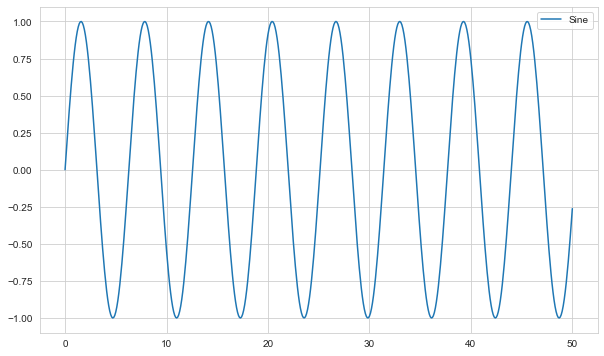

In [31]:
df.plot()

The more length the more training time

In [32]:
# Let's redefine to get 10 steps back and then predict the next step out
length = 64 # Length of the output sequences (in number of timesteps)
batch_size = 1 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)

In [33]:
# What does the first batch look like?
X, y = generator[0]

In [34]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n{y}')

Given the Array: 
[4.99999116e-01 5.49916225e-01 5.99334579e-01 6.47760405e-01
 6.94709850e-01 7.39713809e-01 7.82322618e-01 8.22110545e-01
 8.58680040e-01 8.91665714e-01 9.20737985e-01 9.45606372e-01
 9.66022399e-01 9.81782075e-01 9.92727935e-01 9.98750612e-01
 9.99789928e-01 9.95835500e-01 9.86926839e-01 9.73152957e-01
 9.54651478e-01 9.31607263e-01 9.04250562e-01 8.72854714e-01
 8.37733417e-01 7.99237589e-01 7.57751870e-01 7.13690771e-01
 6.67494535e-01 6.19624741e-01 5.70559686e-01 5.20789614e-01
 4.70811810e-01 4.21125636e-01 3.72227539e-01 3.24606094e-01
 2.78737119e-01 2.35078919e-01 1.94067715e-01 1.56113277e-01
 1.21594831e-01 9.08572769e-02 6.42077324e-02 4.19124713e-02
 2.41942605e-02 1.12301346e-02 3.14962674e-03 3.34747619e-05
 1.91281421e-03 8.76886734e-03 2.05331307e-02 3.70880598e-02
 5.82682430e-02 8.38620552e-02 1.13613771e-01 1.47226122e-01
 1.84363264e-01 2.24654135e-01 2.67696162e-01 3.13059283e-01
 3.60290246e-01 4.08917133e-01 4.58454081e-01 5.08406134e-01]
Predi

## Modelling

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [36]:
# We're only using one feature in our time series
n_features = 1

In [37]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(units = 64, activation = "tanh", input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(units = 1))

model.compile(optimizer='adam', loss='mse')

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 64)                4224      
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [39]:
(64*64) + (64 + 64)

4224

In [40]:
model.fit_generator(generator = generator, epochs = 5)

Epoch 1/5
362/362 [==============================] - 2s 4ms/step - loss: 0.0180
Epoch 2/5
362/362 [==============================] - 1s 4ms/step - loss: 6.7225e-05
Epoch 3/5
362/362 [==============================] - 1s 4ms/step - loss: 9.2037e-05
Epoch 4/5
362/362 [==============================] - 1s 4ms/step - loss: 5.8745e-05
Epoch 5/5
362/362 [==============================] - 1s 4ms/step - loss: 1.7324e-05


<AxesSubplot:>

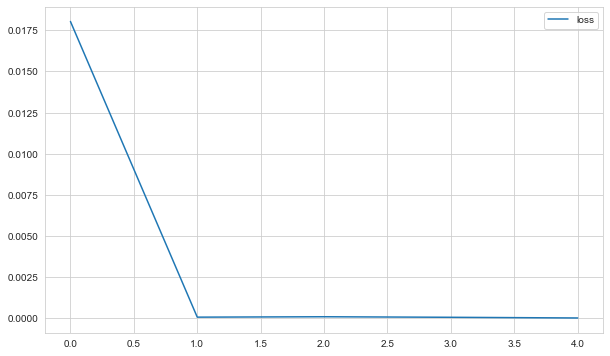

In [41]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

## Evaluate on Test Data

In [42]:
first_eval_batch = train_scaled[-length:]

In [43]:
first_eval_batch.shape

(64, 1)

In [44]:
generator[0][0].shape

(1, 64, 1)

In [45]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [46]:
first_eval_batch.shape

(1, 64, 1)

In [47]:
model.predict(first_eval_batch)

array([[0.00657322]], dtype=float32)

In [48]:
test_scaled[0]

array([0.00885189])

In [49]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [50]:
current_batch.shape

(1, 64, 1)

In [51]:
current_batch

array([[[1.27922981e-03],
        [7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.7

In [52]:
np.append(current_batch[:,1:,:], [[[0.0082]]], axis = 1)

array([[[7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.72558686e-01],
        [8.3

### Final For Loop to predict step by step 

In [53]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [54]:
test_predictions

[array([0.00657322], dtype=float32),
 array([0.01874846], dtype=float32),
 array([0.03490783], dtype=float32),
 array([0.05538378], dtype=float32),
 array([0.08017378], dtype=float32),
 array([0.10839953], dtype=float32),
 array([0.14134635], dtype=float32),
 array([0.17777228], dtype=float32),
 array([0.2169896], dtype=float32),
 array([0.2600427], dtype=float32),
 array([0.3050065], dtype=float32),
 array([0.3512652], dtype=float32),
 array([0.40108657], dtype=float32),
 array([0.45189378], dtype=float32),
 array([0.5035059], dtype=float32),
 array([0.55578053], dtype=float32),
 array([0.605773], dtype=float32),
 array([0.65801835], dtype=float32),
 array([0.70780843], dtype=float32),
 array([0.75523096], dtype=float32),
 array([0.80095774], dtype=float32),
 array([0.84216255], dtype=float32),
 array([0.8807666], dtype=float32),
 array([0.9160659], dtype=float32),
 array([0.94618434], dtype=float32),
 array([0.97220635], dtype=float32),
 array([0.9932208], dtype=float32),
 array([1.0

In [55]:
test_scaled

array([[8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],
       [5.58715219e-01],
       [6.07993616e-01],
       [6.56192968e-01],
       [7.02831682e-01],
       [7.47443761e-01],
       [7.89583454e-01],
       [8.28829716e-01],
       [8.64790412e-01],
       [8.97106234e-01],
       [9.25454293e-01],
       [9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],


## Inverse Transformations and Comparing

In [56]:
true_predictions = scaler.inverse_transform(test_predictions)

In [57]:
true_predictions

array([[-0.98684388],
       [-0.96249359],
       [-0.93017512],
       [-0.88922354],
       [-0.83964393],
       [-0.78319288],
       [-0.71729977],
       [-0.64444849],
       [-0.56601448],
       [-0.47990899],
       [-0.38998209],
       [-0.29746546],
       [-0.19782351],
       [-0.09620991],
       [ 0.00701348],
       [ 0.11156193],
       [ 0.21154601],
       [ 0.31603593],
       [ 0.4156153 ],
       [ 0.5104596 ],
       [ 0.60191242],
       [ 0.68432138],
       [ 0.7615288 ],
       [ 0.83212683],
       [ 0.89236328],
       [ 0.9444069 ],
       [ 0.98643546],
       [ 1.01583891],
       [ 1.03829633],
       [ 1.04939868],
       [ 1.04947879],
       [ 1.04067812],
       [ 1.01821736],
       [ 0.98944905],
       [ 0.95127938],
       [ 0.9039073 ],
       [ 0.84966882],
       [ 0.78709863],
       [ 0.7181763 ],
       [ 0.64531426],
       [ 0.56722112],
       [ 0.48505916],
       [ 0.40004967],
       [ 0.31071662],
       [ 0.22149204],
       [ 0

In [58]:
test

,Sine
42.600,-0.982
42.700,-0.959
42.800,-0.925
42.900,-0.883
43.000,-0.832
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


In [59]:
test['Predictions'] = true_predictions

In [60]:
test

,Sine,Predictions
42.600,-0.982,-0.987
42.700,-0.959,-0.962
42.800,-0.925,-0.930
42.900,-0.883,-0.889
43.000,-0.832,-0.840
...,...,...
49.600,-0.617,-0.789
49.700,-0.536,-0.727
49.800,-0.449,-0.656
49.900,-0.357,-0.579


<AxesSubplot:>

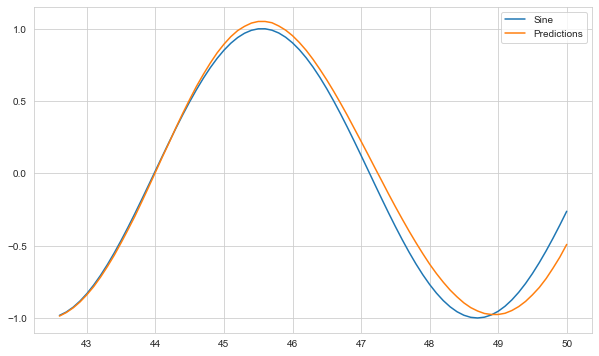

In [61]:
test.plot()

## Early Stopping and Validation Generator

In [87]:
from tensorflow.keras.callbacks import EarlyStopping

In [88]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [90]:
length = 64 # lenght range have to be shorter than range of test data
            # In this case lenght range = 64, test range = 75
batch_size =1

generator = TimeseriesGenerator(data = train_scaled, 
                                targets = train_scaled, 
                                length = length, 
                                batch_size = batch_size)

validation_generator = TimeseriesGenerator(data = test_scaled, 
                                           targets = test_scaled, 
                                           length = length, 
                                           batch_size = batch_size)

In [91]:
len(validation_generator)

11

## LSTM

In [92]:
# define model
model = Sequential()

# LSTM layer
model.add(LSTM(units = 64, activation = "tanh", input_shape = (length, n_features)))

# Final Prediction
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mse')

In [93]:
model.fit_generator(generator = generator,
                    validation_data = validation_generator,
                    epochs = 20,
                    callbacks = [early_stop])

Epoch 1/20
362/362 [==============================] - 4s 10ms/step - loss: 0.0137 - val_loss: 1.0033e-04
Epoch 2/20
362/362 [==============================] - 3s 10ms/step - loss: 1.6443e-04 - val_loss: 8.3668e-06
Epoch 3/20
362/362 [==============================] - 3s 10ms/step - loss: 2.5379e-04 - val_loss: 9.1101e-06
Epoch 4/20
362/362 [==============================] - 3s 9ms/step - loss: 1.7840e-04 - val_loss: 4.7874e-05


<AxesSubplot:>

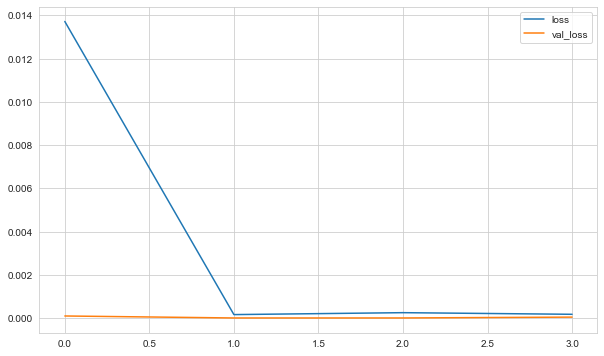

In [94]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [95]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [96]:
len(current_batch[:, 1:, :])

1

In [97]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test

,Sine,Predictions,LSTM Predictions
42.600,-0.982,-0.987,-0.961
42.700,-0.959,-0.962,-0.934
42.800,-0.925,-0.930,-0.897
42.900,-0.883,-0.889,-0.852
43.000,-0.832,-0.840,-0.798
...,...,...,...
49.600,-0.617,-0.789,-0.582
49.700,-0.536,-0.727,-0.509
49.800,-0.449,-0.656,-0.431
49.900,-0.357,-0.579,-0.349


<AxesSubplot:>

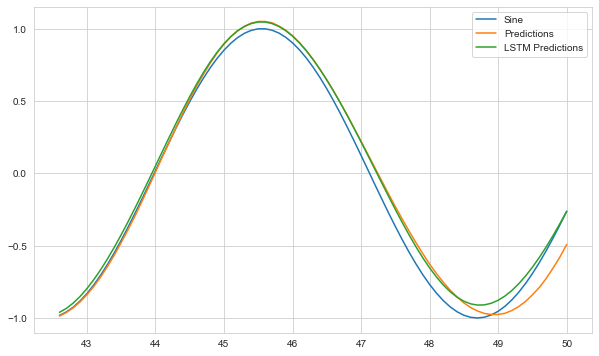

In [98]:
test.plot()

## Retrain and Forecasting

In [99]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [100]:
length = 64 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

In [101]:
model = Sequential()
model.add(LSTM(64, input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.fit_generator(generator, epochs = 6)

Epoch 1/6
437/437 [==============================] - 5s 9ms/step - loss: 0.0096
Epoch 2/6
437/437 [==============================] - 4s 9ms/step - loss: 3.4734e-04A: 0s - loss: 3.2
Epoch 3/6
437/437 [==============================] - 4s 9ms/step - loss: 1.2100e-04
Epoch 4/6
437/437 [==============================] - 4s 9ms/step - loss: 8.8845e-05
Epoch 5/6
437/437 [==============================] - 4s 9ms/step - loss: 1.3413e-04
Epoch 6/6
437/437 [==============================] - 4s 9ms/step - loss: 3.6068e-04


In [102]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(64):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [103]:
forecast = scaler.inverse_transform(forecast)

In [77]:
forecast

array([[-0.18285934],
       [-0.08473002],
       [ 0.01409899],
       [ 0.11281445],
       [ 0.21053203],
       [ 0.30631306],
       [ 0.39918065],
       [ 0.48813724],
       [ 0.57218841],
       [ 0.6503644 ],
       [ 0.72174719],
       [ 0.78549396],
       [ 0.84085908],
       [ 0.8872136 ],
       [ 0.92405839],
       [ 0.95103071],
       [ 0.9679081 ],
       [ 0.97460165],
       [ 0.97114592],
       [ 0.95769016],
       [ 0.93448113],
       [ 0.90185024],
       [ 0.8601992 ],
       [ 0.80998973],
       [ 0.75173345],
       [ 0.68598779],
       [ 0.61335093],
       [ 0.53446232],
       [ 0.450005  ],
       [ 0.36070687],
       [ 0.26734898],
       [ 0.17076401],
       [ 0.07184648],
       [-0.02845034],
       [-0.12911343],
       [-0.22907725],
       [-0.32723309],
       [-0.42244681],
       [-0.51357902],
       [-0.59951315],
       [-0.67918309],
       [-0.75160334],
       [-0.81589764],
       [-0.8713208 ],
       [-0.91727698],
       [-0

In [104]:
df

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


In [105]:
len(forecast)

64

In [106]:
64*0.1

6.4

In [107]:
forecast_index = np.arange(50.1, 56.5, step = 0.1)

In [108]:
len(forecast_index)

64

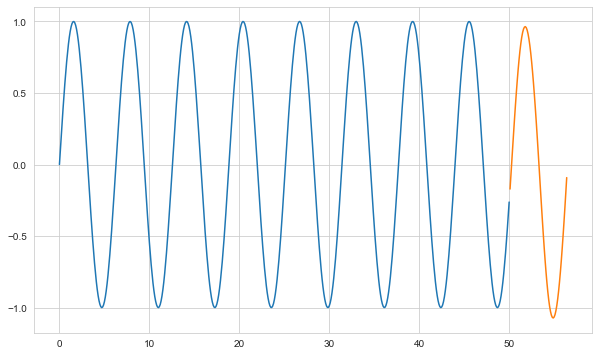

In [109]:
plt.plot(df.index, df['Sine'])
plt.plot(forecast_index, forecast)